# MAE performance without/with partial information of circulating isolates
Plot MAE scores of our model without/with information of 10% of randomly selected circulating isolates over 14 test seasons from 2014NH to 2020SH.

Note that, as it uses results from Fig. 2 and Supp. Fig. 7, first run the associated notebooks [Fig2_model_evaluation](Fig2_model_evaluation.ipynb) and [SuppFig7_circIsolatesTrain](SuppFig7_circIsolatesTrain.ipynb) before running this notebook.

## Imports

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context(rc={"axes.labelsize":9,
                    "xtick.labelsize":8,
                    "ytick.labelsize":8,
                    "legend.fontsize":8,
                    "legend.title_fontsize":8})

## Filenames

In [2]:
path_result = "../results/Fig3_antigenicMaps_withWithoutCircIsolatesTrain/"   # results will be saved in this directory
Path(path_result).mkdir(parents=True, exist_ok=True)   # make directory if it does not exist already

# filename for performance of our model
scores_fn = "../results/Fig2_model_evaluation/Fig2_performance_testScores.csv"
# filename for performance of our model with partial information of circulating isolates for training
scores_circTrain_fn = "../results/SuppFig7_circIsolatesTrain/SuppFig7_circIsolatesTrain.csv"
# output figure
fig_fn    = path_result + "Fig3b_MAE_withoutWith_circIsolatesTrain.svg"

## Read scores and prepare data for plotting

In [3]:
# prepare performance scores of our model
scores = pd.read_csv(scores_fn)
scores = scores[['season', 'MAE']]
scores['circ_train'] = 0
scores['run'] = 0

# prepare performance scores of our model with partial information of circulating isolates for training
# keep scores with only 10% of circulating isolates used for training
scores_circTrain = pd.read_csv(scores_circTrain_fn)
scores_circTrain = scores_circTrain[['run', 'circ_train', 'season', 'MAE']]
scores_circTrain = scores_circTrain[scores_circTrain.circ_train == '10%']

# combine scores
scores = pd.concat([scores, scores_circTrain], ignore_index=True)

# remove average scores
scores = scores[scores.season != 'Average']

# take average over runs
scores_mean = scores.groupby(['season', 'circ_train'], as_index=True).mean()
scores_mean.drop(columns=['run'], inplace=True)
scores_mean = scores_mean.unstack(level=0)
scores_mean.columns = scores_mean.columns.droplevel()

## Plot MAE per season

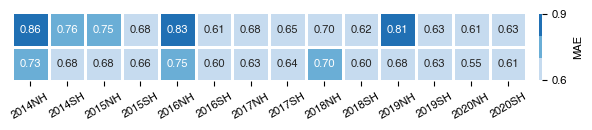

In [4]:
fig, ax = plt.subplots(figsize=(8,0.9))

tmp = sns.heatmap(scores_mean,
                  annot=True, annot_kws={"size":8}, fmt='.2f',
                  vmin=0.6,
                  vmax=0.9,
                  cmap=sns.color_palette("Blues", 3),
                  cbar_kws={"shrink":0.95,
                            "orientation":"vertical",
                            "label":"MAE",
                            "ticks":[0.6,0.9],
                            "pad":0.02},
                  linewidths=1,
                  # square=True,
                  ax=ax)

# configurations for figure
cbar = tmp.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.yaxis.label.set_size(8)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.get_yaxis().set_visible(False)
                  

ax.set_xlabel("")
ax.set_ylabel("")

# save figure
fig.savefig(fig_fn, format='svg', bbox_inches='tight')